In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_regression

In [3]:
X,y = make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[ 1.1149756 ,  0.29443771],
       [ 1.15945773, -0.51372112],
       [-0.41016524, -0.20074697],
       ...,
       [-0.60403018,  0.92618153],
       [ 0.88314443, -0.02092871],
       [-0.15507665,  0.07159699]])

In [5]:
y

array([ 1.26748119e+02,  6.06215747e+01, -5.45625438e+01, -3.71429173e+01,
       -3.47423504e+02, -2.82499966e+01, -2.70669420e+02, -6.19493094e+01,
       -6.74709239e+01,  5.47718739e+01, -3.15860818e+02, -1.84408256e+02,
        7.64061933e+01, -2.71240124e+02, -1.70781685e+02,  1.89102859e+02,
       -3.99088943e+01, -6.32865656e+01, -4.54235595e+01, -5.32555110e+01,
       -1.30602121e+01, -7.13534157e+01, -8.65369215e+01,  2.49378056e+02,
       -6.93668439e+01, -8.35530464e+01, -6.09139657e+01,  6.02712653e+01,
       -1.29691542e+02,  2.26153707e+01,  4.70581455e+01,  5.40942826e+01,
       -3.17250935e+02, -1.07277667e+02,  3.67658422e+01,  1.10572467e+02,
        8.60976379e+01,  2.20152264e+00,  9.75576604e+01, -2.69622701e+01,
        9.81035588e+01, -5.60551272e+01, -5.87252605e+01, -3.46403596e+01,
        7.61919445e+01, -8.70491573e+01, -7.25993042e+00,  2.74798077e+02,
       -4.90124953e+01,  6.86543501e+01,  1.12604762e+02,  7.93352389e+01,
       -1.22407540e+02, -

In [9]:
pd.DataFrame(X)[0]

0      1.114976
1      1.159458
2     -0.410165
3      0.312816
4     -2.171793
         ...   
995    0.624631
996    0.306506
997   -0.604030
998    0.883144
999   -0.155077
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

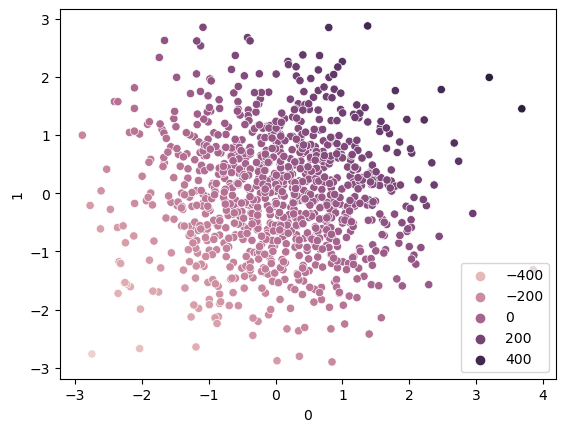

In [10]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1],hue=y)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [12]:
from sklearn.svm import SVR

In [13]:
svr=SVR(kernel='linear')

In [14]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [15]:
svr.coef_

array([[90.15938979, 92.10662362]])

In [17]:
# Prediction
y_pred=svr.predict(X_test)

In [18]:
y_pred

array([ -22.59704173,  148.70087351,  -17.60354173,  -85.79825418,
         -7.22963253,  -25.24932928,  113.14928104, -106.3805473 ,
       -186.77789777,   -1.72620271, -121.55228781,   28.42581324,
        -17.47618214,  110.04979438, -212.35787134, -100.64540063,
        226.59981411,   88.44429795, -164.57995593,    1.11717025,
       -189.5572058 ,  102.94374601,  141.21187602,   29.95507939,
        -34.04359383,  -37.47458114,  189.18997811,   73.8642252 ,
       -122.53359213,  163.11126775,   17.77549591,   79.61881983,
        465.89199096, -111.39602054,  -95.77881154, -272.12184414,
       -122.18525939,  -25.10804169,   54.89064605,  -23.08568246,
       -100.7308118 ,   94.35001144,  256.43473486,  240.37434632,
        115.48039626,   14.98249969,   71.75071699, -126.1364788 ,
        -90.5416205 ,    5.71571066,   64.74495588, -115.81621097,
        -72.08467352,  105.11990572,  220.36816744, -140.01808734,
        -85.67933029,  227.3714918 ,  -93.99037521,  -81.09119

In [19]:
from sklearn.metrics import r2_score

In [20]:
print(r2_score(y_test,y_pred))

0.9993933240413161


## Hyperparameter tuning with svr

In [21]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [22]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [23]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.614 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.605 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.602 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.599 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.592 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.614 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.605 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.602 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.599 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.592 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [24]:
grid.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [25]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9993998025780318
